### CSV    VS   TSV

CSV: comma separated values
TSV: tab sparated values

어떤 것을 쓰는게 좋을까?
- 일반 텍스트에는 ,(comma)를 포함할 확률이 높으므로 tab을 구분자로 쓴 파일을 쓰는 것을 권장함

In [2]:
import pandas as pd
import numpy as np

dataset = pd.read_csv('C:/Users/Ina Lee/PythonStudy/2019_study/Machine_Learning_AZ_Template_Folder/Machine Learning A-Z Template Folder/Part 7 - Natural Language Processing/Section 36 - Natural Language Processing/Restaurant_Reviews.tsv', delimiter = '\t', quoting = 3)
# 1 - positive review , 0 - negative review

### data cleaning

- 텍스트 데이터를 분류하기 쉬운 형태로 정리해주는 과정
- 필요 없는 단어나 문자 (불용어)제거 (ex. an, the, 구두점 등등) - 검색할때 의미가 없는 단어들
- stemming (어간 추출) 과정 : loved / loving  모두 love에서 파생된 단어이므로, 각각 형태를 구분짓지 않고 'love'한 단어로 변형(어차피 그 의미 자체는 변화가 없으므로)

#####  re.sub() 는 문자열에서 매치된 텍스트를 다른 텍스트로 치환할 때 사용한다

In [3]:
import re  #텍스트 데이터 정리해주는데 유용한 툴 지닌 library 
review = dataset['Review'][0]

In [4]:
review

'Wow... Loved this place.'

In [5]:
review = re.sub('[^a-zA-Z]', ' ', review)     # a-z / A-Z 사이의 글자는 제외, 이외의 불필요한 문자는 공백으로 처리한다.

In [6]:
review

'Wow    Loved this place '

In [7]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to C:\Users\Ina
[nltk_data]     Lee\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [8]:
review = review.lower()    #소문자로 바꿔줌
review = review.split() #공백 중심으로 단어 쪼개줌

In [9]:
review

['wow', 'loved', 'this', 'place']

In [10]:
review = [word for word in review if not word in set(stopwords.words("english"))] #해당 리뷰에 있는 불용어 제거하기. 

# set() 은 안해줘도 되지만, 텍스트가 더 많은 기사나 문헌에 있어서 set() 을 해주는게 연산이 더빠름.
# set type은 순서가 없고, 집합안에서는 unique한 값을 가짐 

In [11]:
review

['wow', 'loved', 'place']

### stemming

In [12]:
from nltk.stem.porter import PorterStemmer

In [13]:
ps = PorterStemmer()
review = [ps.stem(word) for word in review if not word in set(stopwords.words('english'))] #ps.stem() - 각 단어에 대해 기본 어간 형태로 바꾸어줌 

In [14]:
review

['wow', 'love', 'place']

In [15]:
review = ' '.join(review) ## 다시 하나의 string 형태로

In [16]:
review

'wow love place'

In [17]:
# Cleaning the texts
corpus = [] 
for i in range(0, 1000): #총 1000개의 데이터 이므로
    review = re.sub('[^a-zA-Z]', ' ', dataset['Review'][i])
    review = review.lower()   
    review = review.split()
    ps = PorterStemmer()
    review = [ps.stem(word) for word in review if not word in set(stopwords.words('english'))]
    review = ' '.join(review)
    corpus.append(review)

In [18]:
corpus

['wow love place',
 'crust good',
 'tasti textur nasti',
 'stop late may bank holiday rick steve recommend love',
 'select menu great price',
 'get angri want damn pho',
 'honeslti tast fresh',
 'potato like rubber could tell made ahead time kept warmer',
 'fri great',
 'great touch',
 'servic prompt',
 'would go back',
 'cashier care ever say still end wayyy overpr',
 'tri cape cod ravoli chicken cranberri mmmm',
 'disgust pretti sure human hair',
 'shock sign indic cash',
 'highli recommend',
 'waitress littl slow servic',
 'place worth time let alon vega',
 'like',
 'burritto blah',
 'food amaz',
 'servic also cute',
 'could care less interior beauti',
 'perform',
 'right red velvet cake ohhh stuff good',
 'never brought salad ask',
 'hole wall great mexican street taco friendli staff',
 'took hour get food tabl restaur food luke warm sever run around like total overwhelm',
 'worst salmon sashimi',
 'also combo like burger fri beer decent deal',
 'like final blow',
 'found place acc

### bag-of-words
- cleaning을 거쳐 corpus(말뭉치) 형태로 정제한 텍스트에서 토큰화를 거쳐 각 단어의 출현 빈도를 나타낸 것
- 출현한 단어들을 중복 없이, one column for each word
- sparse matrix(희소행렬: 행렬의 원소에 비교적 0이 많은 행렬) 을 만듦

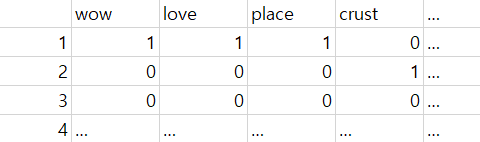

#### 해당 데이터에서 NLP는 결국 classification, 리뷰가 positive(1) 인지 negative(0)인지를 예측하는 것이므로....

- 독립변수는 각 단어들의 출현빈도
- 종속변수는 부정적 or 긍정적 리뷰
- 따라서 한 단어에 대한 칼럼은 독립변수(X feature) : 각 단어는 실제 리뷰 데이터에서 파생된것이므로, 해당 리뷰에 각각 단어가 나타나는지 / 나타나지 않는지를 나타낸 칼럼들이 결국 독립변수로 작용함.

#### CountVectorizer Class Parameter 살펴보기
- stop_wrods : 불용어 제거
- lowercase : 소문자로 변환
- token_pattern : re.sub('[^a-zA-Z]', ' ', dataset['Review'][i]) 와 기능 똑같음 (특정 문자열을 or 특정 문자열을 제외하고 다른 문자열로 변환)


##### 이와 같은 기능들이 있지만 추천하지 않으며, 위에서처럼 전처리 과정 적어주는 것이 적절.
- step by step 으로 전처리 과정을 보는 것이 좋음.(원데이터가 깔끔하지 않는 이상, 중간 중간 관여해야할 것들이 많기 때문)
- 원하는 생김새대로 컨트롤하기가 쉬움. 

In [19]:
# Creating the Bag of Words model
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features = 1500) # 가장 최빈도 단어 상위 1500개만 추출
X = cv.fit_transform(corpus).toarray() # sparse matrix 만들어줌
y = dataset.iloc[:, 1].values # negative 인지 positive 인지 판단한 column

In [20]:
print(len(X))
print(len(X[0]))

1000
1500


#### 보통 NLP Classification 에서는 일반적으로 나이브베이즈 / decision tree 모델 많이 사용

In [40]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 0)

0.73

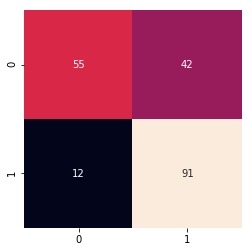

In [58]:
# Fitting Naive Bayes to the Training set
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_train, y_train)

# Predicting the Test set results
y_pred = classifier.predict(X_test)

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

import seaborn as sns
sns.heatmap(cm, square=True, annot=True, fmt='d', cbar=False)

from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

In [39]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.73

## Multinomial Naive Bayes
#### 데이터가  Multinomial distribution (다항 분포) 를 따르는 경우를 의미 
- 다항분포는 여러 범주/이벤트 중에서 input 데이터가 각각 범주/이벤트를 가지고 있는 빈도수 및 확률을 의미
- 하나의 문서에서 단어의 출현을 나타내는 이벤트를 가지고 문서 분류를 하는데 사용되는 이벤트 모델
- 텍스트 분류에 주로 사용

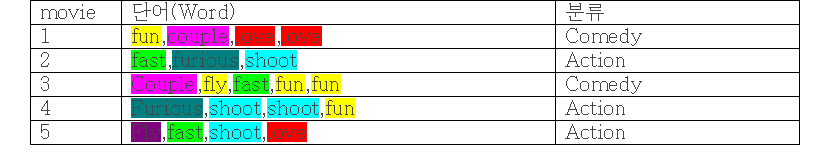

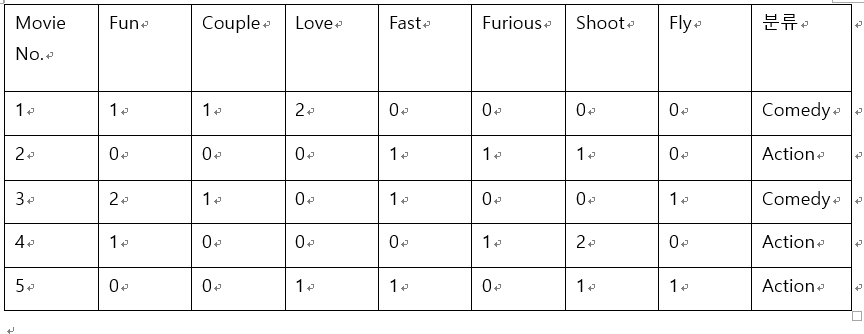
            어떤 문서에 “fun,furious,fast” 라는 3개의 단어가 있을때,  이 문서가 코메디인지 액션 영화인지?

0.765

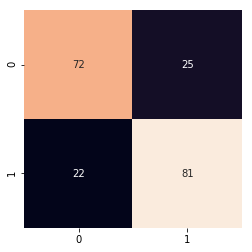

In [59]:
# Fitting Naive Bayes to the Training set
from sklearn.naive_bayes import MultinomialNB
classifier = MultinomialNB()
classifier.fit(X_train, y_train)

# Predicting the Test set results
y_pred = classifier.predict(X_test)

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

import seaborn as sns
sns.heatmap(cm, square=True, annot=True, fmt='d', cbar=False)

from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.655

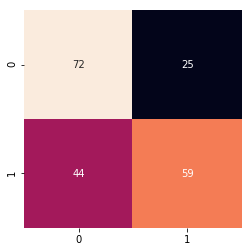

In [93]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier()
classifier.fit(X_train,y_train)

# Predicting the Test set results
y_pred = classifier.predict(X_test)

# Making the Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, square=True, annot=True, fmt='d', cbar=False)
accuracy_score(y_test,y_pred)